In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/NLP

/content/drive/MyDrive/NLP


In [3]:
ls

 dataset.csv                      NLP_Shawn_LSTM.ipynb
 emotion_data_start_point.ipynb   Sarcasm_Headlines_Dataset.json
 FinalDatasetwithpeprosing.csv    Sarcasm_Headlines_Dataset_v2.json
 newTXT.zip                      'textCNNs (1).ipynb'
 NLP_LSTM_1.ipynb


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# load data from csv 
df = pd.read_csv('FinalDatasetwithpeprosing.csv')

In [6]:
df.content=df.content.astype(str)

In [7]:


# Convert sentiment to numeric with label encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sentiment'] = le.fit_transform(df['sentiment'])

from sklearn.model_selection import train_test_split

# Split the data into train, test and validation sets with split ratio 70:15:15
train_text, temp_text, train_labels, temp_labels = train_test_split(df['content'], df['sentiment'],
                                                                    random_state=42,  
                                                                    test_size=0.3,
                                                                    stratify=df['sentiment'])

val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels,
                                                                random_state=42,
                                                                test_size=0.5,
                                                                stratify=temp_labels)

# Convert pandas Series to numpy arrays
train_text, train_labels = train_text.values, train_labels.values
val_text, val_labels = val_text.values, val_labels.values
test_text, test_labels = test_text.values, test_labels.values

In [8]:
train_text[0]

"Everyone's allergic to Poison Ivy; i know it guys, me too. L, you can't change, and me neither, so...i guess it's enough"

In [9]:
train_labels[0]

5

In [10]:
print(train_text.shape,train_labels.shape),
print(val_text.shape,val_labels.shape),
print(test_text.shape,test_labels.shape)

(10716,) (10716,)
(2296,) (2296,)
(2297,) (2297,)


In [11]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 23.0 MB/s eta 0:00:00


In [12]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random
from tensorflow.keras.preprocessing.text import Tokenizer

In [13]:
def show_history(h):
  epochs_trained = len(h.history['loss'])
  plt.figure(figsize=(16,6))

  plt.subplot(1,2,1)
  plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
  plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
  plt.ylim([0.,1.])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
  plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
  
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  
  plt.show()

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [15]:
def show_confusion_matrix(y_true,y_pred,classes):
  from sklearn.metrics import confusion_matrix

  cm = confusion_matrix(y_true,y_pred)
  
  # set the figure size
  plt.figure(figsize=(10, 8))

# plot the confusion matrix
  sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, fmt='g')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()

  
  #sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=emotions, yticklabels=emotions, fmt='g')
  #plt.figure(figsize=(8,8))
  #sp= plt.subplot(1,1,1)
  #clx = sp.matshow(cm)
  #plt.xticks(list(range(0,7)), labels=classes)
  #plt.yticks(list(range(0,7)), labels=classes)
  #plt.colorbar(clx)
  #plt.show

In [16]:
print('Using Tensorflow version',tf.__version__)

Using Tensorflow version 2.12.0


In [17]:
classes=[
  'anger', 'happiness', 'love', 'neutral', 'sadness', 'surprise', 'worry'
]

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [19]:
tokenizer = Tokenizer(num_words=1000 , oov_token='<UNK>')


In [20]:
train_text=np.array(train_text)

In [21]:
tokenizer.fit_on_texts(train_text)

In [22]:
train_text.shape

(10716,)

In [23]:
tokenizer.texts_to_sequences([train_text[10]])

[[16, 49, 150, 26, 4, 364, 44, 44, 9, 21, 5, 1, 28]]

In [24]:
train_text[10]

"I'm really mad at the world today. Today is just a sucky day."

In [25]:
train_labels[10]

0

In [26]:
classes[train_labels[10]]

'anger'

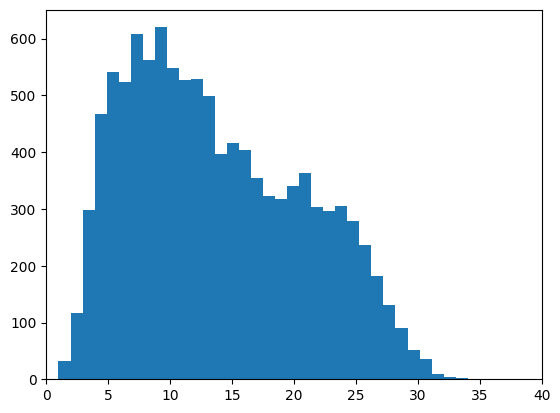

In [27]:
lengths=[len(t.split(' ')) for t in train_text]
plt.hist(lengths,bins=len(set(lengths)))
plt.xlim(left=0, right=40)
plt.show()

In [28]:
maxlen = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
def get_sequences(tokenizer,dia):
  sequences=tokenizer.texts_to_sequences(dia)
  padded=pad_sequences(sequences, truncating='post',padding='post',maxlen=maxlen)
  return padded

In [30]:
padded_train_seq=get_sequences(tokenizer,train_text)

In [31]:
padded_train_seq.shape

(10716, 50)

In [32]:
padded_train_seq[10]

array([ 16,  49, 150,  26,   4, 364,  44,  44,   9,  21,   5,   1,  28,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [33]:
tokenizer.texts_to_sequences([train_text[10]])

[[16, 49, 150, 26, 4, 364, 44, 44, 9, 21, 5, 1, 28]]

(array([1531., 1531., 1531., 1531., 1531., 1531., 1530.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

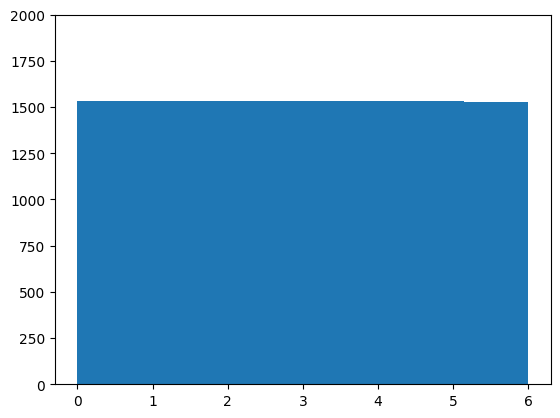

In [34]:
plt.ylim(top=2000)
plt.hist(train_labels,bins=7)


In [35]:
class_to_index = {
  
  'anger':0, 'happiness':1, 'love':2, 'neutral':3, 'sadness':4, 'surprise':5, 'worry':6
}
index_to_class = dict((v,k) for k,v in class_to_index.items())

In [36]:
class_to_index

{'anger': 0,
 'happiness': 1,
 'love': 2,
 'neutral': 3,
 'sadness': 4,
 'surprise': 5,
 'worry': 6}

In [37]:
index_to_class

{0: 'anger',
 1: 'happiness',
 2: 'love',
 3: 'neutral',
 4: 'sadness',
 5: 'surprise',
 6: 'worry'}

Modeling

In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(1000,16,input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(40,return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(40,return_sequences=True)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=False)),
    tf.keras.layers.Dense(7, activation='softmax')

])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 bidirectional (Bidirectiona  (None, 50, 80)           18240     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 50, 80)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 50, 80)           38720     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 50, 80)            0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 40)               1

In [40]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [41]:
val_seq = get_sequences(tokenizer,val_text)

In [42]:
val_seq.shape

(2296, 50)

In [43]:
test_seq = get_sequences(tokenizer,test_text)

In [44]:
test_seq.shape

(2297, 50)

In [45]:
h=model.fit(
    padded_train_seq,train_labels,
    validation_data=(val_seq, val_labels),
    epochs=100
)

Epoch 1/100
335/335 [==============================] - 33s 57ms/step - loss: 1.8475 - accuracy: 0.2157 - val_loss: 1.7271 - val_accuracy: 0.2905
Epoch 2/100
335/335 [==============================] - 7s 21ms/step - loss: 1.6696 - accuracy: 0.3157 - val_loss: 1.7017 - val_accuracy: 0.3088
Epoch 3/100
335/335 [==============================] - 7s 20ms/step - loss: 1.6073 - accuracy: 0.3434 - val_loss: 1.6521 - val_accuracy: 0.3197
Epoch 4/100
335/335 [==============================] - 7s 20ms/step - loss: 1.5661 - accuracy: 0.3694 - val_loss: 1.6609 - val_accuracy: 0.3397
Epoch 5/100
335/335 [==============================] - 6s 19ms/step - loss: 1.5308 - accuracy: 0.3936 - val_loss: 1.6538 - val_accuracy: 0.3349
Epoch 6/100
335/335 [==============================] - 5s 16ms/step - loss: 1.5013 - accuracy: 0.4069 - val_loss: 1.6870 - val_accuracy: 0.3262
Epoch 7/100
335/335 [==============================] - 6s 17ms/step - loss: 1.4775 - accuracy: 0.4263 - val_loss: 1.6708 - val_accuracy

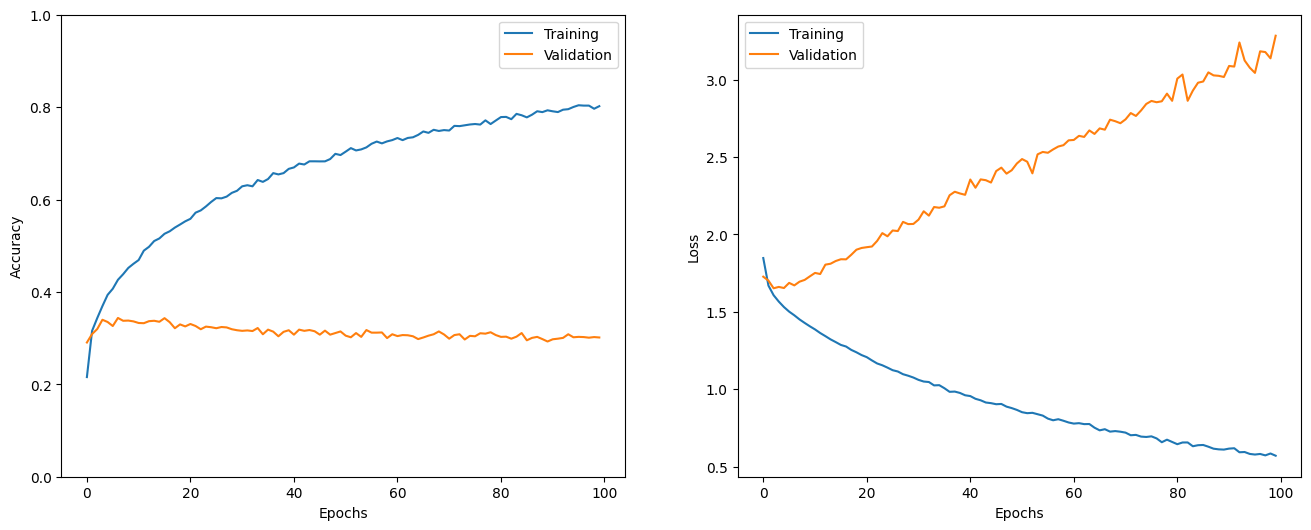

In [46]:
show_history(h)

In [47]:
model.evaluate(test_seq,test_labels)

72/72 [==============================] - 1s 7ms/step - loss: 3.2296 - accuracy: 0.3056


[3.2296411991119385, 0.30561602115631104]

In [48]:
preds=model.predict(test_seq)
classes_x=np.argmax(preds,axis=1)

72/72 [==============================] - 2s 8ms/step


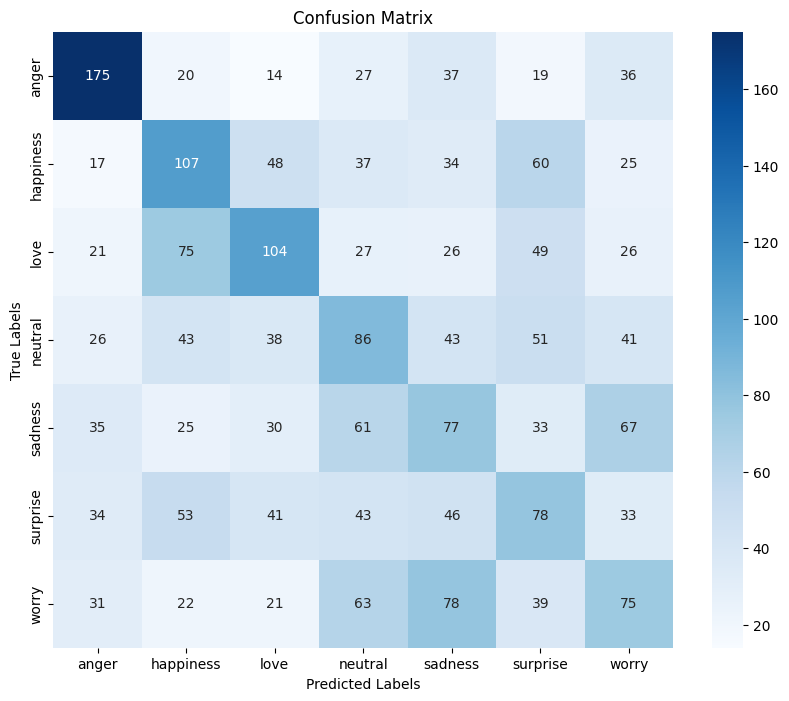

In [49]:
show_confusion_matrix(test_labels,classes_x,list(classes))

In [58]:
from sklearn.metrics import classification_report

# get the true labels and predicted labels
#true_labels = np.argmax(test_labels, axis=1)
#pred_labels = np.argmax(preds, axis=1)

# print the classification report
print(classification_report(test_labels, classes_x, target_names=classes))


              precision    recall  f1-score   support

       anger       0.52      0.53      0.52       328
   happiness       0.31      0.33      0.32       328
        love       0.35      0.32      0.33       328
     neutral       0.25      0.26      0.26       328
     sadness       0.23      0.23      0.23       328
    surprise       0.24      0.24      0.24       328
       worry       0.25      0.23      0.24       329

    accuracy                           0.31      2297
   macro avg       0.31      0.31      0.31      2297
weighted avg       0.31      0.31      0.31      2297



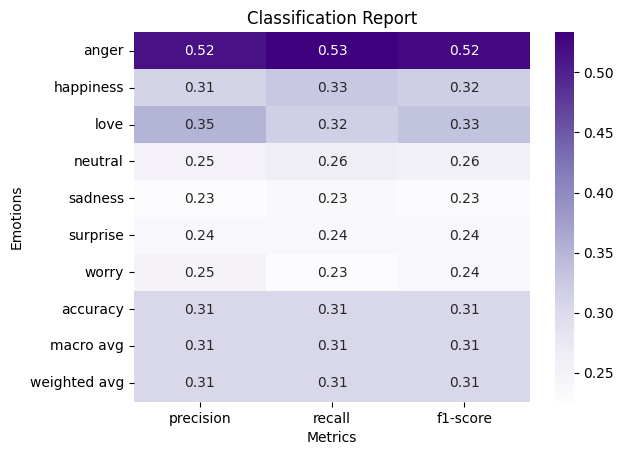

In [59]:
from sklearn.metrics import classification_report

# get the true labels and predicted labels
#true_labels = np.argmax(test_sentiments, axis=1)
#pred_labels = np.argmax(y_pred, axis=1)

# get the classification report
report = classification_report(test_labels, classes_x, target_names=classes, output_dict=True)

# plot the classification report
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Purples')
plt.xlabel('Metrics')
plt.ylabel('Emotions')
plt.title('Classification Report')
plt.show()